# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this project,In this project, deep neural networks and convolutional neural networks are used to classify traffic signs. Specifically,we will train a model to classify traffic signs from the German Traffic Sign Dataset and later use this model to predict the sign in the images from web.

---
## Step 0: Load The Data

In [3]:
# Load pickled data
import pickle
import cv2

# Filling based on where the training and testing data is saved

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

#print(X_train)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**
 

### Basic Summary of the Data Set Using Python and Numpy

In [5]:
import numpy as np

# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# The shape of an traffic sign image
image_shape = X_train[0].shape

# Unique classes/labels in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("Number of validation examples=", n_validation)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
Number of validation examples= 4410


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s) by plotting a bar graph of classes vs number of images in each class

14


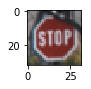

In [6]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
%matplotlib inline

#randomly choosing an image data and visualize the image

index = random.randint(0,len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])
# Visualizations will be shown in the notebook.


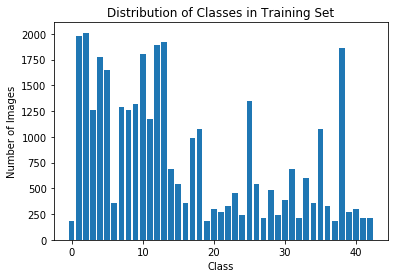

In [205]:
classes = [i for i in range(n_classes)]

unique, counts = np.unique(y_train, return_counts=True) #counting total data in each unique class

#Plotting Bar graph 
plt.bar(classes,counts)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Classes in Training Set')

In [206]:
#counting classes which have image data less than 500
image_class_low = [i for i, j in enumerate(counts) if j<500]
print('Number of classes with low images :',len(image_class_low))
print(image_class_low)

Number of classes with low images : 21
[0, 6, 16, 19, 20, 21, 22, 23, 24, 27, 28, 29, 30, 32, 34, 36, 37, 39, 40, 41, 42]


In [207]:
#counting total number of image data whose class fall under low class list
count = 0
print('Classes with low images:',end = "")
for i, j in enumerate(y_train):
    if(j in image_class_low):
        count += 1
        
print(count)

Classes with low images:6060


In [208]:
"""Augmentation techniques"""

#changing brightness
def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    #print(random_bright)
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

#rotating images
def rotate_images(img):
    ang_range = 20
    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    return img

#translation
def translate_images(img):
    trans_range = 5
    rows,cols,ch = img.shape
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    return img

#shear
def shear_images(img):
    shear_range = 10
    rows,cols,ch = img.shape
    pts1 = np.float32([[5,5],[20,5],[5,20]])
    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2
    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])
    shear_M = cv2.getAffineTransform(pts1,pts2)
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    return img
    

In [209]:
k = 0
X_train_extended = np.zeros((4*count, 32, 32, 3))  #initializing the array which will contain augmented images
y_train_extended = np.zeros(4*count, dtype='int')  #initializing the array which will contain corresponding labels
for i, j in enumerate(y_train):
    if(j in image_class_low):
        
        X_train_extended[k] = augment_brightness_camera_images(X_train[i])
        y_train_extended[k] = y_train[i]
        k += 1
        
        X_train_extended[k] = rotate_images(X_train[i])
        y_train_extended[k] = y_train[i]
        k += 1
        
        X_train_extended[k] = translate_images(X_train[i])
        y_train_extended[k] = y_train[i]
        k += 1
        
        X_train_extended[k] = shear_images(X_train[i])
        y_train_extended[k] = y_train[i]
        k += 1

In [210]:
#appending the augmented images to the training set
X_train = np.append(X_train, X_train_extended, axis=0) 
y_train = np.append(y_train, y_train_extended, axis=0)
print(X_train.shape)
print(y_train.shape)

(59039, 32, 32, 3)
(59039,)


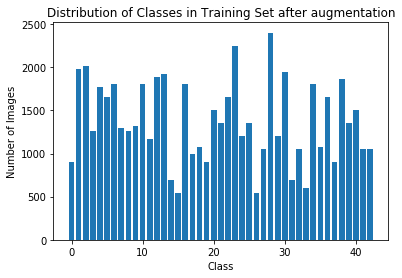

In [211]:
#visualize change in image data after augmentation

classes = [i for i in range(n_classes)]

unique, counts = np.unique(y_train, return_counts=True)


plt.bar(classes,counts)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Classes in Training Set after augmentation')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs.

### Pre-process the Data Set (normalization, grayscale, etc.)

Converting rgb image into single channel grayscale image and normalize image data using (X-128)/128

In [7]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)  #shuffling the data

grayconver= np.array([[0.2989],[0.5870],[0.1140]]) #weights for each colour channel to form a single channel
def gray_normalize(img):
    img1 = np.zeros((len(img),32,32,1))
    img1[:,:,:,] = np.dot(img[...,:3],grayconver)
    #print(img1[0].shape)
    img1 = (np.array(img1) - 128.0) / 128.0
    return img1

In [8]:
#preprocessing training,validation and test data
X_train = gray_normalize(X_train)
X_valid = gray_normalize(X_valid)
X_test = gray_normalize(X_test)

In [13]:
import tensorflow as tf

EPOCHS = 80  
BATCH_SIZE = 128

### Model Architecture

In [11]:
"""Lenet Architechture"""

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    #fc0   = tf.nn.dropout(fc0,keep_prob)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    #fc1    = tf.nn.dropout(fc1,keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    #fc2    = tf.nn.dropout(fc2,keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [14]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32) # probability to keep units

In [218]:
rate = 0.001 #learning rate

logits = LeNet(x)

#calculating loss operation and optimizer

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [219]:
# calculating validation accuracy

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [184]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')  #saved model for future restore
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.800

EPOCH 2 ...
Validation Accuracy = 0.884

EPOCH 3 ...
Validation Accuracy = 0.883

EPOCH 4 ...
Validation Accuracy = 0.917

EPOCH 5 ...
Validation Accuracy = 0.924

EPOCH 6 ...
Validation Accuracy = 0.925

EPOCH 7 ...
Validation Accuracy = 0.925

EPOCH 8 ...
Validation Accuracy = 0.933

EPOCH 9 ...
Validation Accuracy = 0.929

EPOCH 10 ...
Validation Accuracy = 0.925

EPOCH 11 ...
Validation Accuracy = 0.933

EPOCH 12 ...
Validation Accuracy = 0.934

EPOCH 13 ...
Validation Accuracy = 0.932

EPOCH 14 ...
Validation Accuracy = 0.926

EPOCH 15 ...
Validation Accuracy = 0.920

EPOCH 16 ...
Validation Accuracy = 0.925

EPOCH 17 ...
Validation Accuracy = 0.940

EPOCH 18 ...
Validation Accuracy = 0.948

EPOCH 19 ...
Validation Accuracy = 0.941

EPOCH 20 ...
Validation Accuracy = 0.933

EPOCH 21 ...
Validation Accuracy = 0.939

EPOCH 22 ...
Validation Accuracy = 0.939

EPOCH 23 ...
Validation Accuracy = 0.940

EPOCH 24 ...
Validation Accura

In [185]:
#test accuracy against the test data
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.925


---

## Step 3: Test a Model on New Images

10 images have been downloaded from web. Predicted the sign type and calculated the performance of the above trained model.

### Load and Output the Images

10


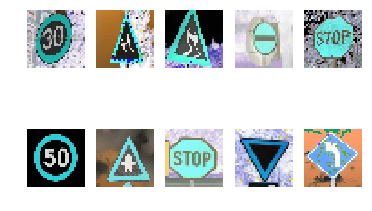

In [194]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
new_images = np.zeros([10, 32, 32, 3])
#list containing images for loading
f_list = ['new_images/30km.jpg', 'new_images/child.jpeg', 'new_images/slippery.jpg','new_images/img2.jpg','new_images/stop.jpg','new_images/img3.jpg','new_images/rightoff.jpg','new_images/img1.jpg','new_images/img4.jpg','new_images/img5.jpg']
print(len(f_list))

for i, t in enumerate(f_list):
    test_image = cv2.imread(t)
    new_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    new_images[i] = cv2.resize(new_image, (32, 32))
    
    plt.subplot(2, 5, i+1)
    plt.imshow(new_images[i])
    plt.axis('off')

In [17]:
#Correct image labels
new_images_label = [1, 28, 23, 17, 14, 2, 11, 14, 13, 34]

### Predict the Sign Type for Each Image

In [199]:
### Run the predictions here and use the model to output the prediction for each image.

test_image_num = len(new_images)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.')) #restoring the previously saved model
    
    new_images_normalized = gray_normalize(new_images)
    results = np.argmax(np.array(sess.run(logits, feed_dict={x: new_images_normalized,keep_prob:0.5})),axis = 1)
print(results)

(32, 32, 1)
[ 1 28 24 17 14  2 11 14 13 12]


### Analyze Performance

In [19]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
print("y  vs y_hat")
for i, result in enumerate(results):
    print('{:02d}:  {:02d}'.format(new_images_label[i], result))
print('Accuracy: {:.02f}'.format(np.sum(new_images_label==results)/len(new_images_label))) #accuracy on these new images

y  vs y_hat
01:  01
28:  28
23:  24
17:  17
14:  14
02:  02
11:  11
14:  14
13:  13
34:  12
Accuracy: 0.80


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [201]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmax = sess.run(tf.nn.softmax(logits), feed_dict = {x:new_images_normalized,keep_prob:0.5})
    top5 = sess.run(tf.nn.top_k(softmax, k=5))

    #print(top_5)
    print("Top 5 Predictions for each image :\n", top5.indices)
    print("Top 5 corresponding probabilities:\n", top5.values)

Top 5 Predictions for each image :
 [[ 1  0 23 21 22]
 [28 27 24 29 20]
 [24 19 23  0 37]
 [17 16 34 40 38]
 [14 13 34 38  9]
 [ 2  1  0  3  4]
 [11 21 30 27  0]
 [14  3 34  2 38]
 [13 42  9 15 34]
 [12 11 34 23  0]]
Top 5 corresponding probabilities:
 [[  9.88838971e-01   1.11609772e-02   7.37002690e-13   4.81171960e-13
    3.10117383e-13]
 [  1.00000000e+00   3.01840996e-12   6.04277409e-21   1.06777207e-23
    2.38694149e-25]
 [  9.99839544e-01   1.60463474e-04   1.77576519e-12   2.84468114e-13
    5.80769767e-14]
 [  9.99791682e-01   2.02283045e-04   3.06682273e-06   3.02087733e-06
    1.37396251e-19]
 [  1.00000000e+00   3.11388493e-09   8.77106073e-14   5.27649417e-14
    1.53828840e-14]
 [  1.00000000e+00   2.94529137e-30   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  1.00000000e+00   7.29954893e-29   6.25719856e-30   1.96136746e-36
    0.00000000e+00]
 [  1.00000000e+00   6.35365760e-09   4.38445417e-12   4.15141986e-15
    1.57578386e-17]
 [  1.00000000e+00   3.1647

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")